In [329]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
#%matplotlib inline
%pylab inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

Populating the interactive namespace from numpy and matplotlib


### 1. EDA & PRELIMINARY ANALYSIS

**Load data and preliminary analysis/visualization**

In [330]:
# Load data 
docu = pd.read_csv('./docu_movies_comprehensive_with_wikis.csv')
docu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1969 non-null   int64  
 1   Unnamed: 0.1          1969 non-null   object 
 2   link_stub             1969 non-null   object 
 3   rank                  1969 non-null   object 
 4   title                 1969 non-null   object 
 5   lifetime_gross        1969 non-null   object 
 6   max_theaters          1969 non-null   object 
 7   opening               1969 non-null   object 
 8   open_th               1969 non-null   object 
 9   release_date          1969 non-null   object 
 10  distributor           1969 non-null   object 
 11  domestic_total_gross  1969 non-null   int64  
 12  international_gross   1969 non-null   int64  
 13  worldwide_gross       644 non-null    float64
 14  budget                30 non-null     float64
 15  runtime              

In [331]:
docu.head(3)

,Unnamed: 0,Unnamed: 0.1,link_stub,rank,title,lifetime_gross,max_theaters,opening,open_th,release_date,...,MPAA,Genres,Director,Writers,Producers,Director_Name,Wikipedia_director,cast_name,cast_bday,cast_bplace
0,0,Fahrenheit 9/11,/title/tt0361596/?ref_=bo_ge_table_1,1,Fahrenheit 9/11,"$119,194,771","2,011","$23,920,637",868,"Jun 23, 2004",...,R,"['Documentary', 'Drama', 'War']",['Michael Moore'],['Michael Moore'],"['Jim Czarnecki', 'Kathleen Glynn', 'Michael M...",Michael Moore,https://en.wikipedia.org/wiki/Michael_Moore,Michael Francis Moore,1954-04-23,"Davison, Michigan, U.S."
1,1,March of the Penguins,/title/tt0428803/?ref_=bo_ge_table_2,2,March of the Penguins,"$77,437,223","2,506","$137,492",4,"Jun 24, 2005",...,NaN,"['Documentary', 'Family']",['Luc Jacquet'],"['Luc Jacquet', 'Luc Jacquet', 'Michel Fessler...","['Yves Darondeau', 'Christophe Lioud', 'Emmanu...",Luc Jacquet,https://en.wikipedia.org/wiki/Luc_Jacquet,NaN,1967-12-05,"Bourg-en-Bresse, France"
2,2,Justin Bieber: Never Say Never,/title/tt1702443/?ref_=bo_ge_table_3,3,Justin Bieber: Never Say Never,"$73,013,910","3,118","$29,514,054","3,105","Feb 11, 2011",...,NaN,"['Documentary', 'Music']",['Jon M. Chu'],[],"['Justin Bieber', 'Scooter Braun', 'Dan Cutfor...",Jon M. Chu,https://en.wikipedia.org/wiki/Jon_M._Chu,Jonathan Murray Chu,1979-11-02,"Palo Alto, California, U.S."


In [332]:
del docu['Unnamed: 0']

In [333]:
del docu['Unnamed: 0.1']

In [334]:
docu.columns

Index(['link_stub', 'rank', 'title', 'lifetime_gross', 'max_theaters',
       'opening', 'open_th', 'release_date', 'distributor',
       'domestic_total_gross', 'international_gross', 'worldwide_gross',
       'budget', 'runtime', 'MPAA', 'Genres', 'Director', 'Writers',
       'Producers', 'Director_Name', 'Wikipedia_director', 'cast_name',
       'cast_bday', 'cast_bplace'],
      dtype='object')

In [335]:
docu.rename(columns = {'Unnamed: 0': 'title_movie', 'Wikipedia_director': 'wiki_url', 'cast_name': 'wiki_director_name', 'cast_bday':'wiki_director_bday', 'cast_bplace': 'wiki_director_bplace' }, inplace=True)
docu.head(3)

,link_stub,rank,title,lifetime_gross,max_theaters,opening,open_th,release_date,distributor,domestic_total_gross,...,MPAA,Genres,Director,Writers,Producers,Director_Name,wiki_url,wiki_director_name,wiki_director_bday,wiki_director_bplace
0,/title/tt0361596/?ref_=bo_ge_table_1,1,Fahrenheit 9/11,"$119,194,771","2,011","$23,920,637",868,"Jun 23, 2004",Lionsgate\n\n,119194771,...,R,"['Documentary', 'Drama', 'War']",['Michael Moore'],['Michael Moore'],"['Jim Czarnecki', 'Kathleen Glynn', 'Michael M...",Michael Moore,https://en.wikipedia.org/wiki/Michael_Moore,Michael Francis Moore,1954-04-23,"Davison, Michigan, U.S."
1,/title/tt0428803/?ref_=bo_ge_table_2,2,March of the Penguins,"$77,437,223","2,506","$137,492",4,"Jun 24, 2005",Warner Independent Pictures (WIP)\n\n,77437223,...,NaN,"['Documentary', 'Family']",['Luc Jacquet'],"['Luc Jacquet', 'Luc Jacquet', 'Michel Fessler...","['Yves Darondeau', 'Christophe Lioud', 'Emmanu...",Luc Jacquet,https://en.wikipedia.org/wiki/Luc_Jacquet,NaN,1967-12-05,"Bourg-en-Bresse, France"
2,/title/tt1702443/?ref_=bo_ge_table_3,3,Justin Bieber: Never Say Never,"$73,013,910","3,118","$29,514,054","3,105","Feb 11, 2011",Paramount Pictures\n\n,73013910,...,NaN,"['Documentary', 'Music']",['Jon M. Chu'],[],"['Justin Bieber', 'Scooter Braun', 'Dan Cutfor...",Jon M. Chu,https://en.wikipedia.org/wiki/Jon_M._Chu,Jonathan Murray Chu,1979-11-02,"Palo Alto, California, U.S."


### 2. PRELIMINARY CLEAN UP

**a. Clean up Release year feature**: turn into integer

In [336]:
docu["release_year"] = docu.release_date.str[-4:]
docu['release_year'] = docu['release_year'].apply(lambda x: int(x))

**b. Clean up Distributor feature**

In [337]:
docu["distributor"] = docu.distributor.str.replace("\n\n", "")

In [338]:
#docu.head(3)

**c. Clean up Max Theaters column:** Turn into integers

In [339]:
docu['max_theaters_new'] = docu['max_theaters'].apply(lambda x: x.replace(',', '').replace('-', '' ))

In [340]:
docu['max_theaters'] = docu['max_theaters_new'].apply(lambda x: int(x) if x.isnumeric() else None) 

In [341]:
del docu['max_theaters_new']

**d. Clean up Opening revenue string:** Get rid of integers

In [342]:
docu['opening_str'] = docu["opening"].apply(lambda x: x.replace("$", "").replace(",", "")) 
docu['opening'] = docu['opening_str'].apply(lambda x: int(x) if x.isnumeric() else None)

In [343]:
del docu['opening_str']

**e. Clean up Opening Theater string:** Get rid of integers

In [344]:
docu['open_th_str'] = docu["open_th"].apply(lambda x: x.replace(',', '')) 
docu['open_th'] = docu["open_th_str"].apply(lambda x: int(x) if x.isnumeric() else None) 

In [345]:
del docu["open_th_str"]

**f. Clean up Lifetime Gross string:** Get rid of integers

In [346]:
docu['lifetime_gross_str'] = docu["lifetime_gross"].apply(lambda x: x.replace(',', '').replace('$', '')) 
docu['lifetime_gross'] = docu["lifetime_gross_str"].apply(lambda x: int(x) if x.isnumeric() else None) 

In [347]:
del docu["lifetime_gross_str"]

### 3. FEATURE ENGINEERING (combined with Cleaning up) 

**a. Genres**

**Clean up Genres feature:** Turn into integer

In [348]:
docu['genres_listed'] = docu['Genres'].apply(lambda x: str(x))

In [349]:
docu['genres_listed'] = docu['genres_listed'].apply(lambda x: x.replace(']', '').\
                                                    replace('[', '').replace('\'', '').\
                                                    split(','))

Great we have the genres listed into a list. Now let's get the 1st and the 2nd listed genre that is not 'documentary'(since all of these movies are documentary, not much info there)

In [350]:
docu['genres_listed'][:5]

0      [Documentary,  Drama,  War]
1           [Documentary,  Family]
2            [Documentary,  Music]
3    [Documentary,  Drama,  Music]
4            [Documentary,  Short]
Name: genres_listed, dtype: object

In [351]:
docu['genres_listed_clean'] = docu['genres_listed'].apply(lambda x:x[1:] \
                                                          if x[0] == 'Documentary'\
                                                          else x)

In [352]:
docu['genres_listed_clean'][:5]

0      [ Drama,  War]
1           [ Family]
2            [ Music]
3    [ Drama,  Music]
4            [ Short]
Name: genres_listed_clean, dtype: object

**Now get a feature that functions as a dummy for whether the observation belongs to a certain secondary genre**

Let's first find out what the most prominent genres are, then go back and do a count on them. 

In [353]:
new_genres= pd.DataFrame(docu['genres_listed_clean'].values.tolist())

In [354]:
new_genres.columns = ['first_genre', 'second_genre', 'third_genre', 'fourth_genre', 'fifth_genre', 'sixth_genre', 'seventh_genre']

In [355]:
docu = pd.concat([docu, new_genres], axis=1)

In [356]:
#docu.head(3)

In [357]:
docu['first_genre'] = docu['first_genre'].apply(lambda x: x.strip() if isinstance(x, str) else x)
docu['second_genre'] = docu['second_genre'].apply(lambda x: x.strip() if isinstance(x, str) else x)
docu['third_genre'] = docu['third_genre'].apply(lambda x: x.strip() if isinstance(x, str) else x)
docu['fourth_genre'] = docu['fourth_genre'].apply(lambda x: x.strip() if isinstance(x, str) else x)
docu['fifth_genre'] = docu['fifth_genre'].apply(lambda x: x.strip() if isinstance(x, str) else x)
docu['sixth_genre'] = docu['sixth_genre'].apply(lambda x: x.strip() if isinstance(x, str) else x)
docu['seventh_genre'] = docu['seventh_genre'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [358]:
docu.first_genre.value_counts()

Biography     388
History       131
Music         118
Drama          75
Sport          62
Comedy         48
Crime          39
Adventure      37
War            32
Family         24
Action         16
News           14
Animation      11
Short           6
Musical         4
Horror          4
Romance         4
Mystery         4
nan             3
Western         2
Thriller        2
Reality-TV      1
Sci-Fi          1
Adult           1
Name: first_genre, dtype: int64

In [359]:
docu.second_genre.value_counts()

Documentary    472
Music           30
Crime           22
History         22
War             20
Comedy          18
Biography       17
News            13
Sport           12
Romance          7
Mystery          5
Family           5
Adventure        5
Drama            4
Thriller         3
Musical          2
Sci-Fi           2
Short            1
Western          1
Name: second_genre, dtype: int64

In [360]:
docu.third_genre.value_counts()

History        103
Music           67
Documentary     58
Drama           57
Sport           22
News            17
Romance         10
Family           9
War              8
Mystery          7
Thriller         4
Western          3
Horror           2
Musical          2
Biography        1
Short            1
Comedy           1
Fantasy          1
Crime            1
Name: third_genre, dtype: int64

In [361]:
docu.fifth_genre.value_counts()

Mystery     4
War         3
Romance     3
Short       2
Family      2
News        2
Music       2
Thriller    1
Fantasy     1
History     1
Sport       1
Drama       1
Horror      1
Name: fifth_genre, dtype: int64

OK, we are fizzling out by the 5th genre. So what we will do is build features which check whether a movie is one of the 10 most popular genres, which consist of: Biography, History, Music, Drama, Sport, Comedy, Crime, Adventure, War. 

In [362]:
docu['biography'] = docu.isin(["Biography"]).any(1)
docu['history'] = docu.isin(["History"]).any(1)
docu['music'] = docu.isin(["Music"]).any(1)
docu['drama'] = docu.isin(["Drama"]).any(1)
docu['sport'] = docu.isin(["Sport"]).any(1)
docu['comedy'] = docu.isin(["Comedy"]).any(1)
docu['crime'] = docu.isin(["Crime"]).any(1)
docu['adventure'] = docu.isin(["Adventure"]).any(1)
docu['war'] = docu.isin(["War"]).any(1)

In [363]:
del docu['first_genre'] 
del docu['second_genre'] 
del docu['third_genre'] 
del docu['fourth_genre'] 
del docu['fifth_genre']
del docu['sixth_genre'] 
del docu['seventh_genre'] 

In [364]:
docu['biography'] = docu['biography'].apply(lambda x: 1 if x else 0)
docu['history'] = docu['history'].apply(lambda x: 1 if x else 0)
docu['music'] = docu['music'].apply(lambda x: 1 if x else 0)
docu['drama'] = docu['drama'].apply(lambda x: 1 if x else 0)
docu['sport'] = docu['sport'].apply(lambda x: 1 if x else 0)
docu['comedy'] = docu['comedy'].apply(lambda x: 1 if x else 0)
docu['crime'] = docu['crime'].apply(lambda x: 1 if x else 0)
docu['adventure'] = docu['adventure'].apply(lambda x: 1 if x else 0)
docu['war'] = docu['war'].apply(lambda x: 1 if x else 0)

**b. distributor**

*Let's figure out dummies*

In [365]:
docu['distributor'].nunique()

274

In [366]:
distributor_counts = docu['distributor'].value_counts()
distributor_counts

-                                  154
First Run                          150
Magnolia Pictures                   99
IFC Films                           71
Abramorama                          67
                                  ... 
MUBI                                 1
XLrator Media                        1
Arc Entertainment                    1
Sky Island Films                     1
Feature Presentations Releasing      1
Name: distributor, Length: 274, dtype: int64

In [367]:
other_distributors = list(distributor_counts[distributor_counts <= 25].index)

In [368]:
docu['distributor'] = docu['distributor'].replace(other_distributors, 'Other')

In [369]:
docu['distributor'].nunique()

15

In [370]:
docu['distributor'].unique()

array(['Other', 'Magnolia Pictures', '-', 'Sony Pictures Classics',
       'THINKFilm', 'IFC Films', 'Fathom Events', 'Oscilloscope',
       'Zeitgeist Films', 'Abramorama', 'International Film Circuit',
       'First Run', 'Kino Lorber', 'The Cinema Guild', 'Icarus Films'],
      dtype=object)

In [371]:
docu['distributor']= docu['distributor'].apply(lambda x: "No Info" if x == "-" else x)

Text(0.5, 1.0, 'Gross income by major distributors')

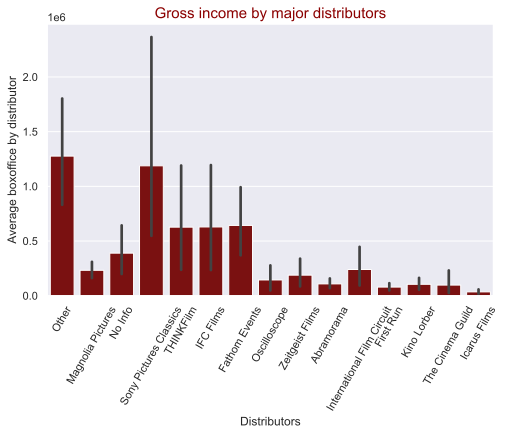

In [372]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.barplot(x=docu.distributor,y=docu.international_gross, color = 'darkred')
plt.xticks(rotation=60)
plt.xlabel("Distributors")
plt.ylabel("Average boxoffice by distributor")
plt.title("Gross income by major distributors", fontsize=15, color='darkred')
#savefig('Major Distributors', dpi = 300, bbox_inches='tight');

In [373]:
docu = pd.get_dummies(docu, columns = ['distributor'], drop_first = True)
docu.head(3)

,link_stub,rank,title,lifetime_gross,max_theaters,opening,open_th,release_date,domestic_total_gross,international_gross,...,distributor_International Film Circuit,distributor_Kino Lorber,distributor_Magnolia Pictures,distributor_No Info,distributor_Oscilloscope,distributor_Other,distributor_Sony Pictures Classics,distributor_THINKFilm,distributor_The Cinema Guild,distributor_Zeitgeist Films
0,/title/tt0361596/?ref_=bo_ge_table_1,1,Fahrenheit 9/11,119194771,2011.0,23920637.0,868.0,"Jun 23, 2004",119194771,103252111,...,0,0,0,0,0,1,0,0,0,0
1,/title/tt0428803/?ref_=bo_ge_table_2,2,March of the Penguins,77437223,2506.0,137492.0,4.0,"Jun 24, 2005",77437223,49955470,...,0,0,0,0,0,1,0,0,0,0
2,/title/tt1702443/?ref_=bo_ge_table_3,3,Justin Bieber: Never Say Never,73013910,3118.0,29514054.0,3105.0,"Feb 11, 2011",73013910,26022917,...,0,0,0,0,0,1,0,0,0,0


### 4. NULL VALUES & Outliers & Values to be dropped

In [374]:
docu.isna().sum()

link_stub                                    0
rank                                         0
title                                        0
lifetime_gross                               0
max_theaters                                22
opening                                    220
open_th                                    218
release_date                                 0
domestic_total_gross                         0
international_gross                          0
worldwide_gross                           1325
budget                                    1939
runtime                                    213
MPAA                                      1463
Genres                                       3
Director                                     1
Writers                                      1
Producers                                    0
Director_Name                              172
wiki_url                                     1
wiki_director_name                        1748
wiki_director

Let's drop some of these columns that have over half of the values as null. Also our target is already highly correlated with worldwide gross so we'll drop that too. Sad to see all our Wikipedia scraping data go but alas, they need to!

In [375]:
del docu['budget']
del docu['worldwide_gross']
del docu['wiki_director_name']
del docu['wiki_director_bday']
del docu['wiki_director_bplace']
del docu['MPAA']
del docu['Director_Name']
del docu['release_date']

In [376]:
docu.isna().sum()

link_stub                                   0
rank                                        0
title                                       0
lifetime_gross                              0
max_theaters                               22
opening                                   220
open_th                                   218
domestic_total_gross                        0
international_gross                         0
runtime                                   213
Genres                                      3
Director                                    1
Writers                                     1
Producers                                   0
wiki_url                                    1
release_year                                0
genres_listed                               0
genres_listed_clean                         0
biography                                   0
history                                     0
music                                       0
drama                             

And let's fill in the max_theaters, opening and open_th with their means.

In [377]:
docu.max_theaters.mean()

67.07139188495121

In [378]:
docu.max_theaters.fillna(docu.max_theaters.mean(), inplace = True)

In [379]:
docu.opening.fillna(docu.opening.mean(), inplace = True)

In [380]:
docu.open_th.fillna(docu.open_th.mean(), inplace = True)

In [381]:
docu.runtime.fillna(docu.runtime.mean(), inplace = True)

Alright, we're done here. Let's do a final summary, and then save our dataset. 

In [382]:
docu.describe()

,lifetime_gross,max_theaters,opening,open_th,domestic_total_gross,international_gross,runtime,release_year,biography,history,...,distributor_International Film Circuit,distributor_Kino Lorber,distributor_Magnolia Pictures,distributor_No Info,distributor_Oscilloscope,distributor_Other,distributor_Sony Pictures Classics,distributor_THINKFilm,distributor_The Cinema Guild,distributor_Zeitgeist Films
count,1.969000e+03,1969.000000,1.969000e+03,1969.000000,1.969000e+03,1.969000e+03,1969.000000,1969.000000,1969.000000,1969.000000,...,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,8.425919e+05,67.071392,1.389031e+05,33.855511,8.445048e+05,8.113363e+05,94.541002,2010.981209,0.206196,0.140681,...,0.016252,0.033012,0.050279,0.078212,0.024378,0.520061,0.024378,0.016252,0.015744,0.028949
std,4.748288e+06,244.389516,1.177298e+06,202.115906,4.749854e+06,6.008492e+06,22.629820,6.526537,0.404676,0.347780,...,0.126475,0.178712,0.218576,0.268574,0.154258,0.499724,0.154258,0.126475,0.124515,0.167705
min,1.926000e+03,1.000000,1.510000e+02,1.000000,1.926000e+03,1.300000e+01,62.000000,1981.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.678300e+04,2.000000,4.438000e+03,1.000000,1.690100e+04,1.231600e+04,85.000000,2007.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.763500e+04,6.000000,9.993000e+03,2.000000,5.799900e+04,4.361600e+04,93.000000,2012.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.533110e+05,22.000000,3.641200e+04,6.000000,2.533110e+05,1.885250e+05,98.000000,2016.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.191948e+08,3481.000000,2.951405e+07,3481.000000,1.191948e+08,1.890926e+08,566.000000,2020.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [383]:
docu.to_csv('docu_clean.csv', index = False)